In [2]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw

In [3]:
# Load image, ensure not palettised, and make into Numpy array
pim = Image.open('sheeran.png').convert('RGB')
im  = np.array(pim)

# Define the blue colour we want to find - PIL uses RGB ordering
blue = [0,0,255]

# Get X and Y coordinates of all blue pixels
X,Y = np.where(np.all(im==blue,axis=2))

print(X,Y)

[] []


In [4]:
def detect_color(image,color):
    im = np.array(image)
    
    #This is an array so results are listed as Y - the row and then X
    Y, X = np.where(np.all(im == color, axis=2))
    
    coords = []
    
    for i in range(len(X)):
        coords.append((X[i],Y[i]))
        
    return coords

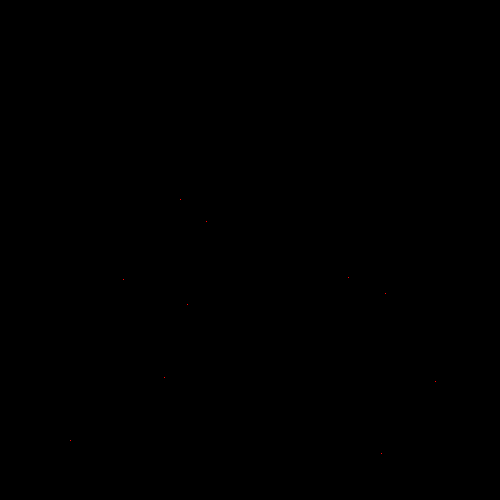

In [5]:
im = Image.new("RGB", (500,500))
draw = PIL.ImageDraw.Draw(im,None)
for i in range(10):
    x_coord = random.randint(0,499)
    y_coord = random.randint(0,499)
    draw.point((x_coord,y_coord), (255,0,0))
im

In [6]:
im.size

(500, 500)

In [125]:
detect = detect_color(im, (255,0,0))

In [126]:
draw.line(detect, fill=(255,0,0), width=1, joint=None)

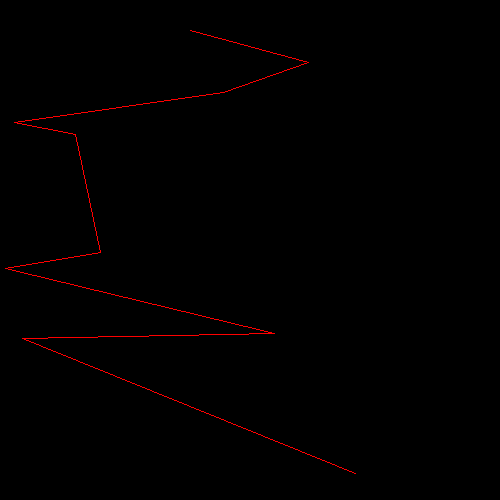

In [127]:
image = im.resize((500,500),PIL.Image.NEAREST)
image

In [128]:
detect[0][0]

190

In [129]:
for coordinate in detect:
    distances = []
    for i in range(len(detect)):
        distance = (coordinate[0]-detect[i][0])**2 + (coordinate[1]-detect[i][1])**2
        distances.append(distance)
    sorted_list = sorted(distances)
    indexes = []
    for d in sorted_list[1:4]:
        index = distances.index(d)
        indexes.append(index)
    for i in indexes:
        draw.line([coordinate, detect[index]], fill=(255,0,0), width=1, joint=None)

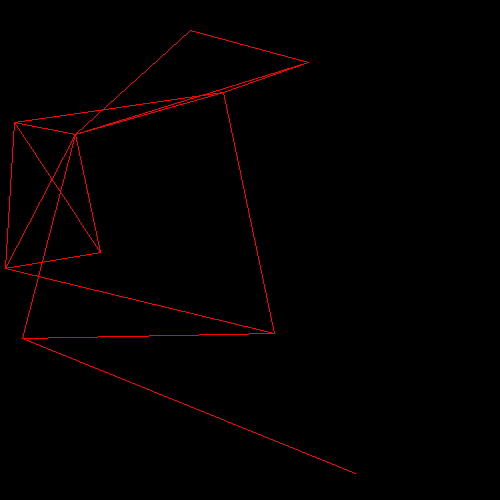

In [130]:
im

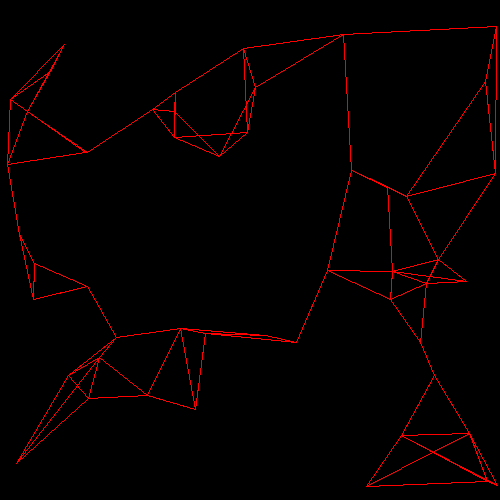

In [329]:
im = Image.new("RGB", (500,500))
draw = PIL.ImageDraw.Draw(im,None)
for i in range(50):
    x_coord = random.randint(0,499)
    y_coord = random.randint(0,499)
    draw.point((x_coord,y_coord), (255,0,0))

detect = detect_color(im, (255,0,0))
#print('The chosen corrdinates are:', detect)

for coordinate in detect:
    #print('Starting with coordinate:', coordinate)
    distances = []
    for i in range(len(detect)):
        distance = (coordinate[0]-detect[i][0])**2 + (coordinate[1]-detect[i][1])**2
        distances.append(distance)
    #print('The distances are:', distances)
    sorted_list = sorted(distances)
    #print('The sorted distances are:', sorted_list)
    indexes = []
    for d in sorted_list[1:4]:
        #print('The distances chosen is:', d)
        index = distances.index(d)
        #print('The index of this distance in the original list:', index)
        indexes.append(index)
        #print('Indexes is now a list containing:', indexes)
    for i in indexes:
        #print('For index:', i, "We draw a line between", coordinate, "and", detect[i])
        draw.line([coordinate, detect[i]], fill=(255,0,0), width=1, joint=None)
im

In [365]:
### This script takes a list of coordinates and connects each corrdinate with its n-closest neighbors with the given color.
### Currently can only be used on a PIL Image
###color should be given as (R,G,B) value
### n <= len(coord_list)
def color_connect(im, coord_list, n, color):
    draw = PIL.ImageDraw.Draw(im,None)
    n = int(n)
    for coordinate in coord_list:
        #print('Starting with coordinate:', coordinate)
        distances = []
        for i in range(len(coord_list)):
            distance = (coordinate[0]-coord_list[i][0])**2 + (coordinate[1]-coord_list[i][1])**2
            distances.append(distance)
        #print('The distances are:', distances)
        sorted_list = sorted(distances)
        #print('The sorted distances are:', sorted_list)
        indexes = []
        for d in sorted_list[1:n]:
            #print('The distances chosen is:', d)
            index = distances.index(d)
            #print('The index of this distance in the original list:', index)
            indexes.append(index)
            #print('Indexes is now a list containing:', indexes)
        for i in indexes:
            #print('For index:', i, "We draw a line between", coordinate, "and", detect[i])
            draw.line([coordinate, coord_list[i]], fill=color, width=1, joint=None)

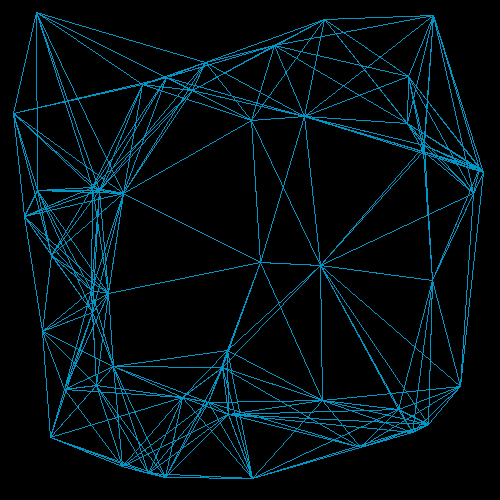

In [534]:
im = Image.new("RGB", (500,500))
coordinates = []
for i in range(50):
    x_coord = random.randint(0,499)
    y_coord = random.randint(0,499)
    coordinates.append((x_coord, y_coord))
color_connect(im,coordinates,10,(0,150,200))
im

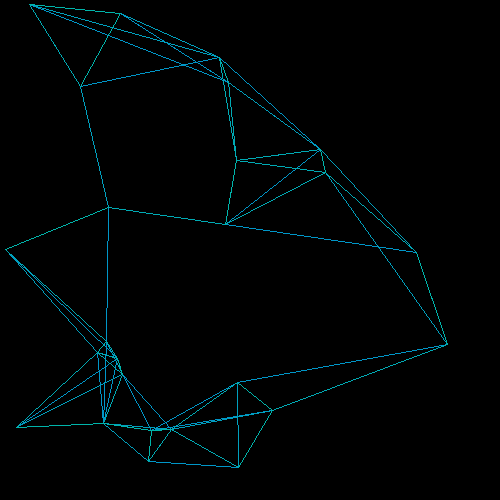

In [535]:
im = Image.new("RGB", (500,500))
coordinates = []
for i in range(25):
    x_coord = random.randint(0,499)
    y_coord = random.randint(0,499)
    coordinates.append((x_coord, y_coord))
for i in range(5):
    color_connect(im,coordinates,5-i,(0,150+(10*i),200-(10*i)))
im

In [478]:
im.save("connect_graphs.png")

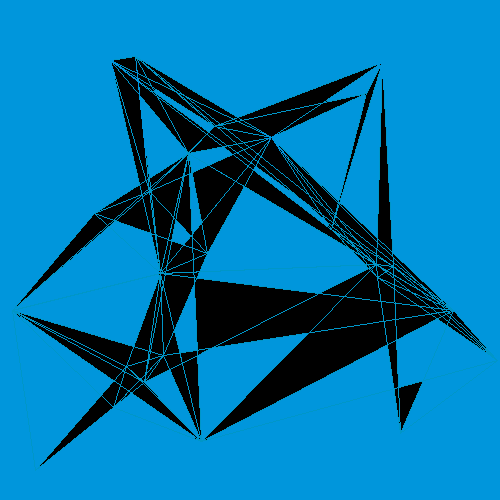

In [542]:
im = Image.new("RGB", (500,500))
coordinates = []
for i in range(25):
    x_coord = random.randint(0,499)
    y_coord = random.randint(0,499)
    coordinates.append((x_coord, y_coord))
    color_connect(im,coordinates,5,(0,150,200))
coordinates = []
for i in range(100):
    x_coord = random.randint(0,499)
    y_coord = random.randint(0,499)
    coordinates.append((x_coord, y_coord))
for j in coordinates:
    PIL.ImageDraw.floodfill(im, j, (0,150,220), border=None, thresh=0)
im

In [533]:
im.save("Partial_fill_5.png")